In [27]:
import numpy as np
import pandas as pd
from detecta import detect_peaks, detect_onset
import spm1d
from tnorma import tnorma
from glob import glob

import pingouin as pg

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.spatial import ConvexHull
from scipy.spatial.distance import cdist
from scipy.stats import chi2

from scipy.signal import butter, filtfilt
import csv

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

def lowpass_filter(data, cut_freq, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cut_freq / nyq
    b, a = butter(order, normal_cutoff, btype= 'low')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def calculate_cop_path_length(cop_data):
    """
    Calculate the total path length of COP movements.
    """
    diffs = np.diff(cop_data, axis=0)
    path_length = np.sum(np.sqrt(np.sum(diffs**2, axis=1)))
    return path_length

def fit_ellipse_to_cop_data(cop_data, coverage=0.95):
    """
    Fit an ellipse to the COP data such that a specified percentage of the points are enclosed.
    """
    mean = np.mean(cop_data, axis=0)
    cov = np.cov(cop_data, rowvar=False)
    
    # Calculate Mahalanobis distance for each data point
    mahal_dist = cdist(cop_data, [mean], 'mahalanobis', VI=np.linalg.inv(cov))**2
    # Determine the distance threshold for the desired coverage
    threshold = chi2.ppf(coverage, df=2)
    
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))
    width, height = 2 * np.sqrt(eigenvalues * threshold)

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='r', fc='None', lw=1)
    area = np.pi * (width / 2) * (height / 2)  # Area of the ellipse

    return ellipse, area



def plot_ellipse(cop_data, coverage=0.95):
    """
    Plot an ellipse covering the specified percentage of COP data points using the fitted ellipse parameters.
    """
    ellipse, area = fit_ellipse_to_cop_data(cop_data, coverage)
    
    # Plotting
    plt.figure(figsize=(5, 4))
    plt.scatter(cop_data[:,0], cop_data[:,1], s=1, label='COP Data')
    plt.gca().add_patch(ellipse)
    plt.xlabel('COP X')
    plt.ylabel('COP Y')

    plt.legend()
    plt.axis('equal')
    # plt.show()

In [28]:
FST_SR_DIR = [i.replace('\\','/') for i in glob('Data/**/1차/*csv') if 'Single Leg Range' in i]
SCD_SR_DIR = [i.replace('\\','/') for i in glob('Data/**/2차/*csv') if 'Single Leg Range' in i]

FST_SL_DIR = [i.replace('\\','/') for i in glob('Data/**/1차/*csv') if 'Single Leg Stand' in i]
SCD_SL_DIR = [i.replace('\\','/') for i in glob('Data/**/2차/*csv') if 'Single Leg Stand' in i]

In [29]:
FST_SL_DIR

['Data/Heongwook Joo/1차/Hyeong wook Joo-Single Leg Stand-2024.03.18-21.39.39-Right1.csv',
 'Data/Heongwook Joo/1차/Hyeong wook Joo-Single Leg Stand-2024.03.18-21.39.39-Right2.csv',
 'Data/Heongwook Joo/1차/Hyeong wook Joo-Single Leg Stand-2024.03.18-21.39.39-Left1.csv',
 'Data/Heongwook Joo/1차/Hyeong wook Joo-Single Leg Stand-2024.03.18-21.39.39-Left2.csv',
 'Data/Soojin Park/1차/Soojin park-Single Leg Stand-2024.03.07-16.41.27-Left2.csv',
 'Data/Soojin Park/1차/Soojin park-Single Leg Stand-2024.03.07-16.41.27-Left1.csv',
 'Data/Soojin Park/1차/Soojin park-Single Leg Stand-2024.03.07-16.41.27-Right1.csv',
 'Data/Soojin Park/1차/Soojin park-Single Leg Stand-2024.03.07-16.41.27-Right2.csv',
 'Data/Seokjoo Yun/1차/Seokjoo Yun-Single Leg Stand-2024.03.05-15.58.32-Right.csv',
 'Data/Seokjoo Yun/1차/Seokjoo Yun-Single Leg Stand-2024.03.05-15.58.32-Left2.csv',
 'Data/Seokjoo Yun/1차/Seokjoo Yun-Single Leg Stand-2024.03.05-15.58.32-Left1.csv',
 'Data/Seokjoo Yun/1차/Seokjoo Yun-Single Leg Stand-2024.03.

In [30]:
dominant = {
    'right' : ['JiHyuck Ahn','JongHyun Eun','Sunjae Min','Hyeri Kim', 'Soojin Park','Naegyeong Lee','Soyun Ji','JongHyun Eun','Minji Kim','Minseok Cho','Seokjoo Yun','Heongwook Joo'],
    'left' : ['JiHwan Park']
}

In [48]:
cop_data[:,0] - cop_data[:,0].mean()

array([ 7.53282747,  6.75772647,  6.44301247, ..., -2.49171553,
       -2.27684553, -1.46173553])

2600
Total COP path length: 1804.74 mm
Total COP path velocity: 138.83 mm/s
Ellipse area (95% COP data): 3004.83 mm^2


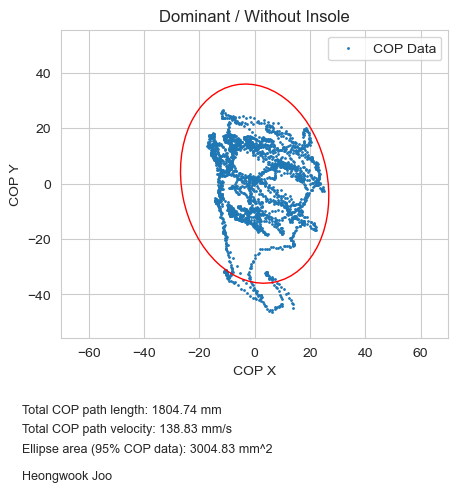

2600
Total COP path length: 1998.79 mm
Total COP path velocity: 153.75 mm/s
Ellipse area (95% COP data): 4070.62 mm^2


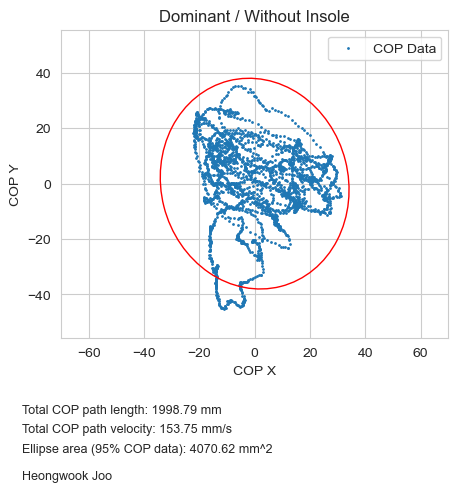

2600
Total COP path length: 2146.02 mm
Total COP path velocity: 165.08 mm/s
Ellipse area (95% COP data): 3262.63 mm^2


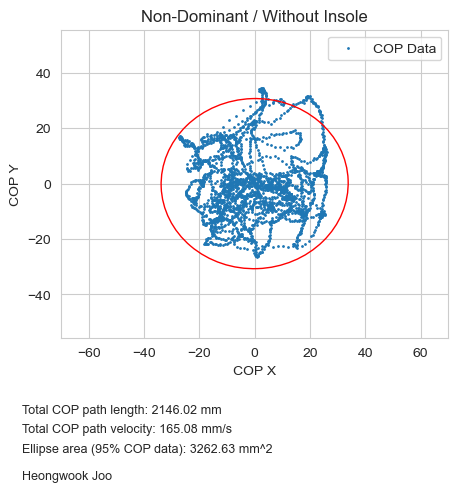

2600
Total COP path length: 2345.47 mm
Total COP path velocity: 180.42 mm/s
Ellipse area (95% COP data): 6128.66 mm^2


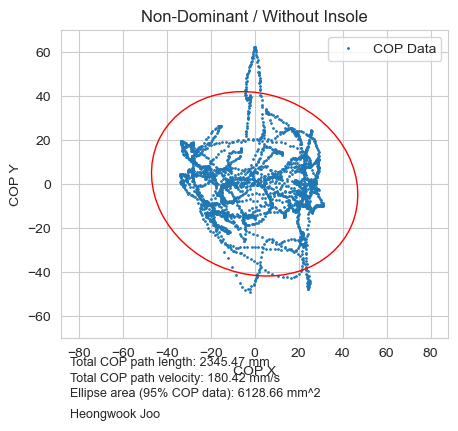

2600
Total COP path length: 1717.82 mm
Total COP path velocity: 132.14 mm/s
Ellipse area (95% COP data): 1476.63 mm^2


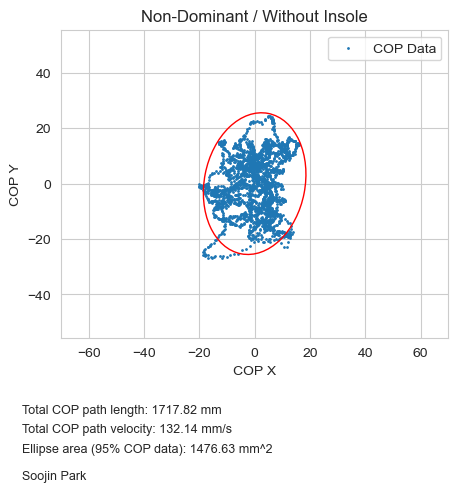

2600
Total COP path length: 2209.44 mm
Total COP path velocity: 169.96 mm/s
Ellipse area (95% COP data): 4813.03 mm^2


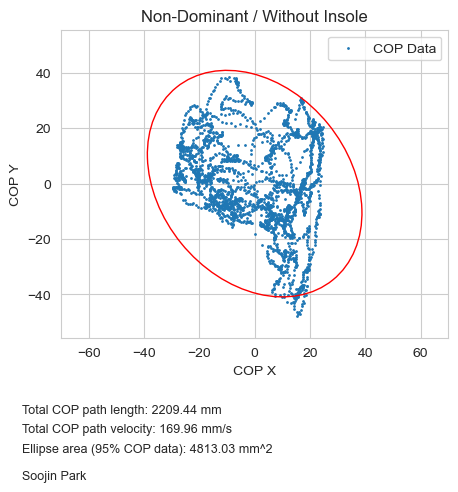

2600
Total COP path length: 1976.35 mm
Total COP path velocity: 152.03 mm/s
Ellipse area (95% COP data): 3600.17 mm^2


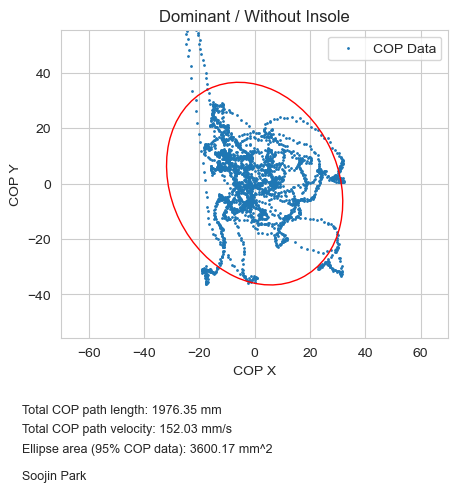

2600
Total COP path length: 2042.84 mm
Total COP path velocity: 157.14 mm/s
Ellipse area (95% COP data): 3476.99 mm^2


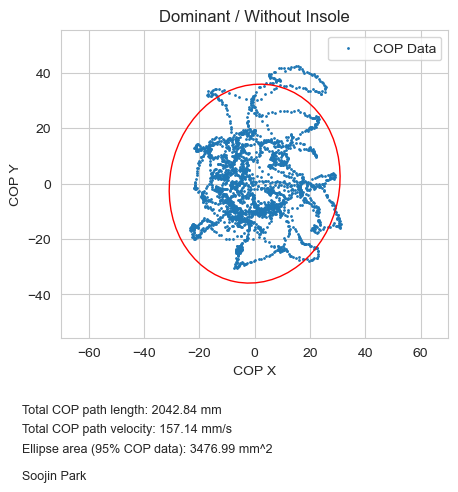

1600
Total COP path length: 1281.19 mm
Total COP path velocity: 160.15 mm/s
Ellipse area (95% COP data): 1840.43 mm^2


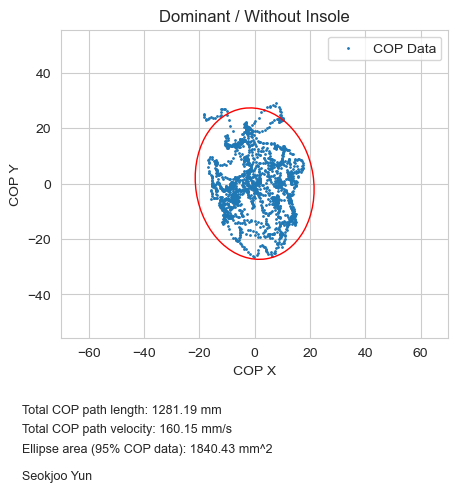

1600
Total COP path length: 1534.24 mm
Total COP path velocity: 191.78 mm/s
Ellipse area (95% COP data): 5144.60 mm^2


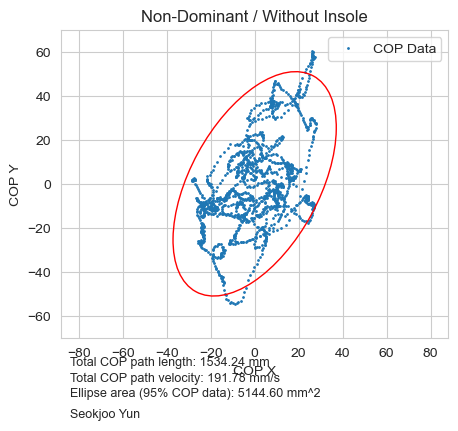

1600
Total COP path length: 1480.17 mm
Total COP path velocity: 185.02 mm/s
Ellipse area (95% COP data): 5736.30 mm^2


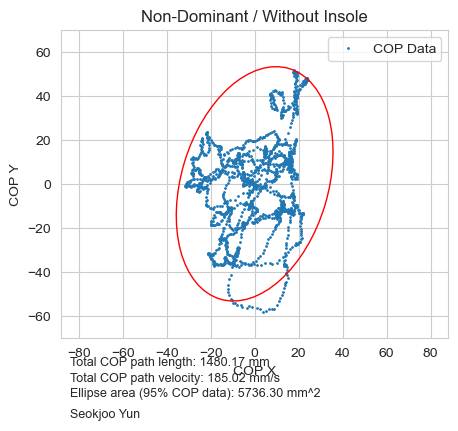

1600
Total COP path length: 1536.61 mm
Total COP path velocity: 192.08 mm/s
Ellipse area (95% COP data): 4367.50 mm^2


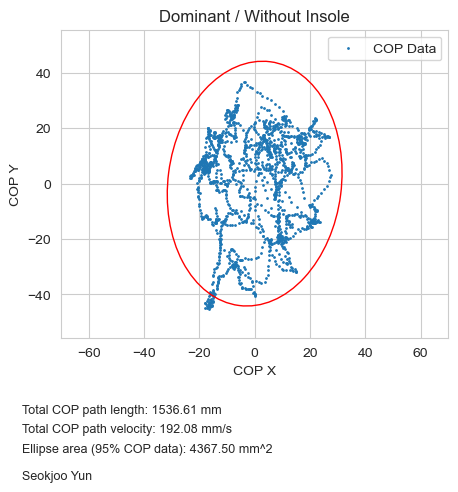

2600
Total COP path length: 2613.11 mm
Total COP path velocity: 201.01 mm/s
Ellipse area (95% COP data): 4369.18 mm^2


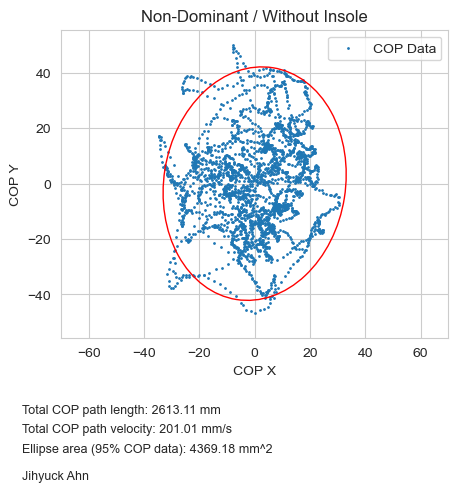

2600
Total COP path length: 2864.85 mm
Total COP path velocity: 220.37 mm/s
Ellipse area (95% COP data): 4886.39 mm^2


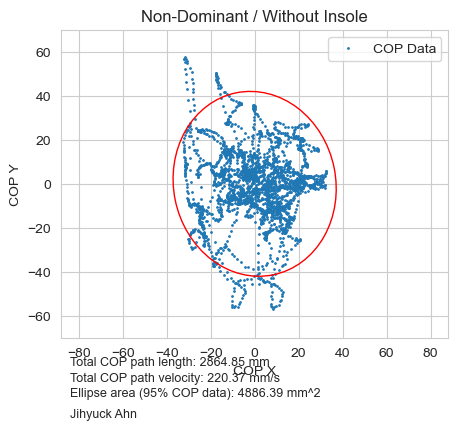

2600
Total COP path length: 2070.59 mm
Total COP path velocity: 159.28 mm/s
Ellipse area (95% COP data): 2197.83 mm^2


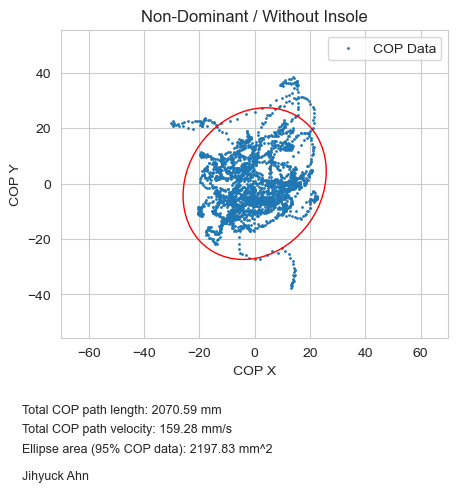

2600
Total COP path length: 2596.05 mm
Total COP path velocity: 199.70 mm/s
Ellipse area (95% COP data): 3999.25 mm^2


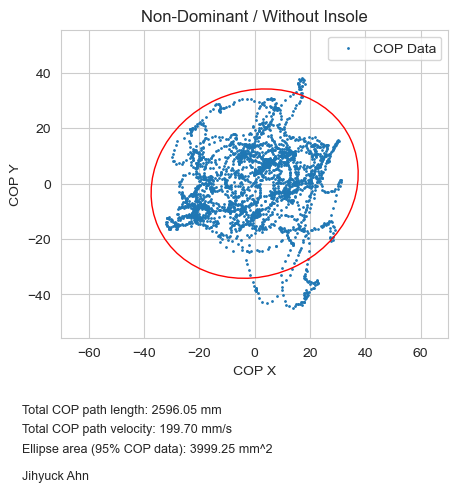

2600
Total COP path length: 2663.79 mm
Total COP path velocity: 204.91 mm/s
Ellipse area (95% COP data): 2183.19 mm^2


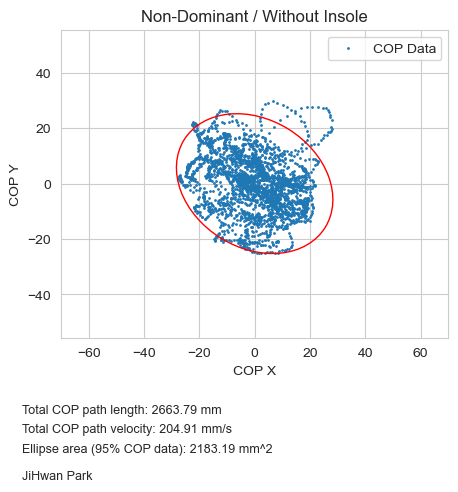

2600
Total COP path length: 2095.57 mm
Total COP path velocity: 161.20 mm/s
Ellipse area (95% COP data): 2286.18 mm^2


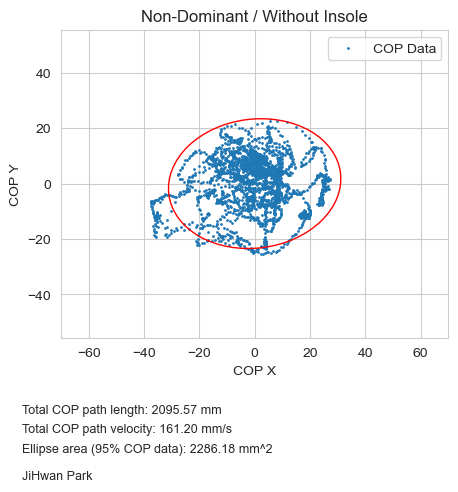

2600
Total COP path length: 2004.31 mm
Total COP path velocity: 154.18 mm/s
Ellipse area (95% COP data): 2709.50 mm^2


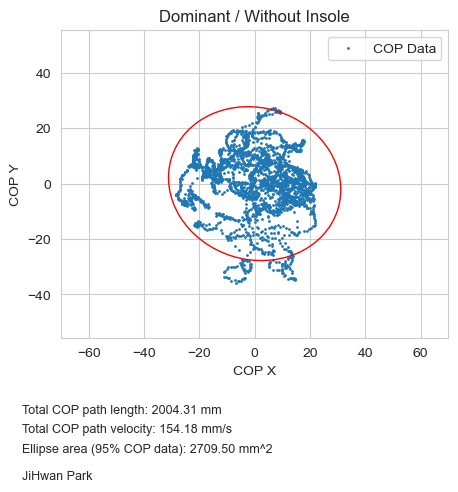

2600
Total COP path length: 1983.68 mm
Total COP path velocity: 152.59 mm/s
Ellipse area (95% COP data): 1903.35 mm^2


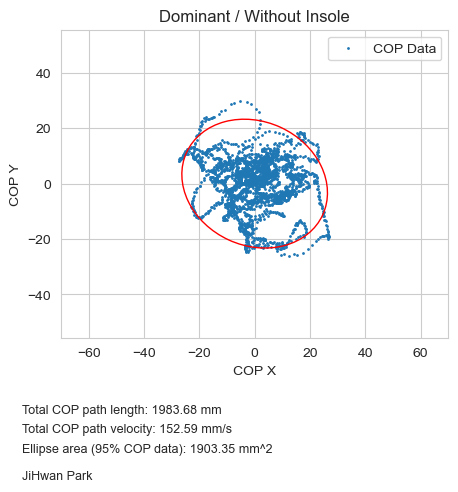

2600
Total COP path length: 2085.61 mm
Total COP path velocity: 160.43 mm/s
Ellipse area (95% COP data): 1790.54 mm^2


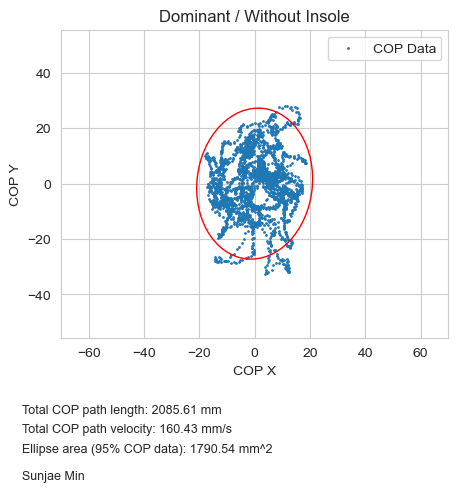

2600
Total COP path length: 2571.17 mm
Total COP path velocity: 197.78 mm/s
Ellipse area (95% COP data): 3008.89 mm^2


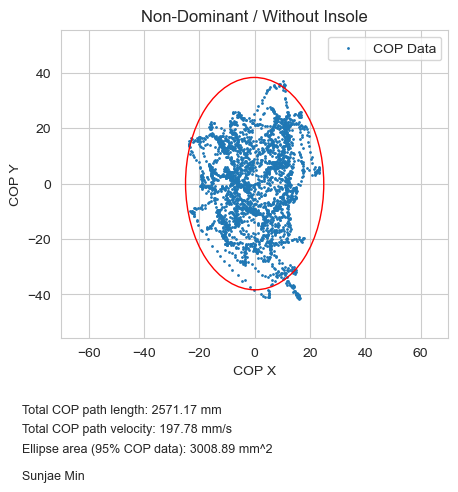

2600
Total COP path length: 2189.94 mm
Total COP path velocity: 168.46 mm/s
Ellipse area (95% COP data): 2401.39 mm^2


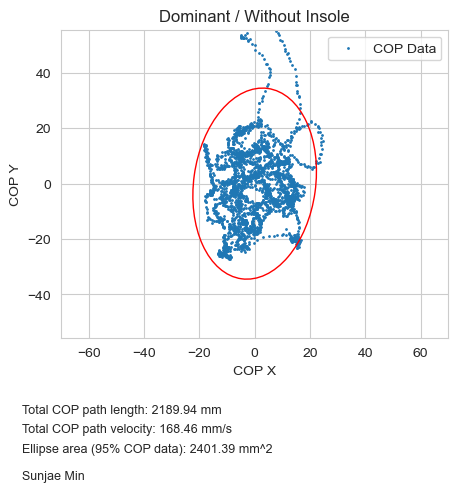

2600
Total COP path length: 2638.30 mm
Total COP path velocity: 202.95 mm/s
Ellipse area (95% COP data): 7299.93 mm^2


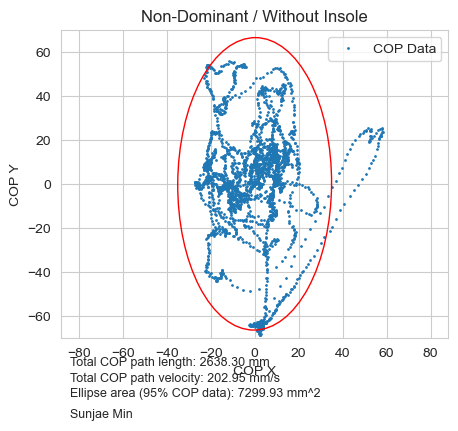

2600
Total COP path length: 2227.35 mm
Total COP path velocity: 171.33 mm/s
Ellipse area (95% COP data): 4130.89 mm^2


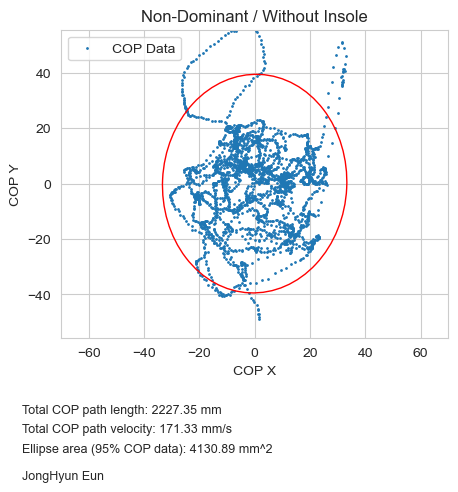

2600
Total COP path length: 1917.65 mm
Total COP path velocity: 147.51 mm/s
Ellipse area (95% COP data): 3115.29 mm^2


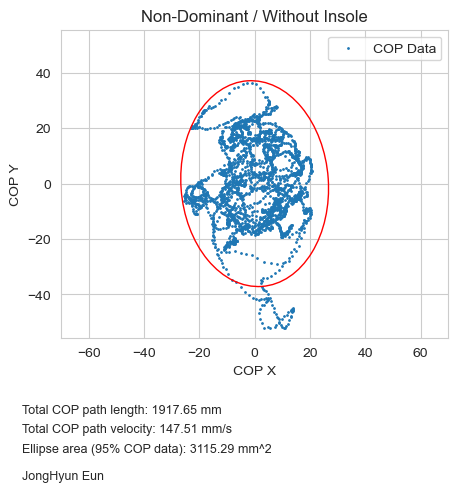

2600
Total COP path length: 1951.28 mm
Total COP path velocity: 150.10 mm/s
Ellipse area (95% COP data): 3203.55 mm^2


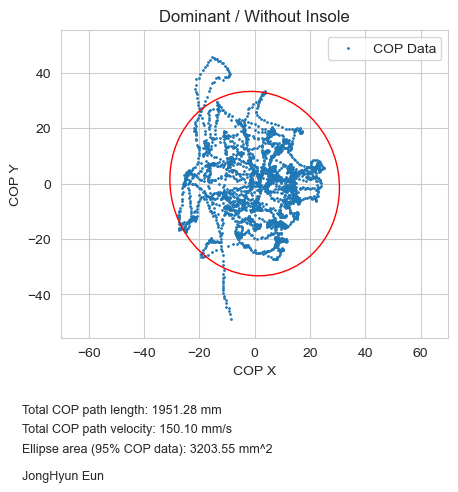

2600
Total COP path length: 2022.32 mm
Total COP path velocity: 155.56 mm/s
Ellipse area (95% COP data): 2940.02 mm^2


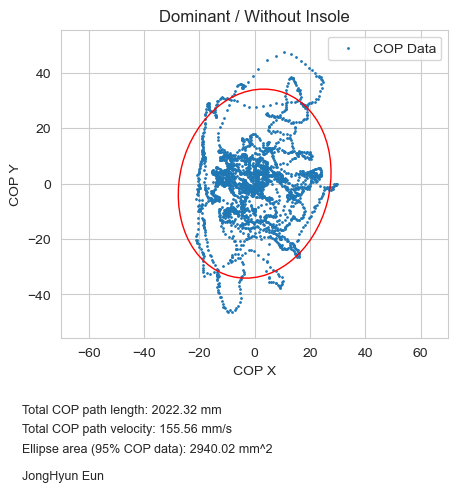

2600
Total COP path length: 2324.65 mm
Total COP path velocity: 178.82 mm/s
Ellipse area (95% COP data): 4093.70 mm^2


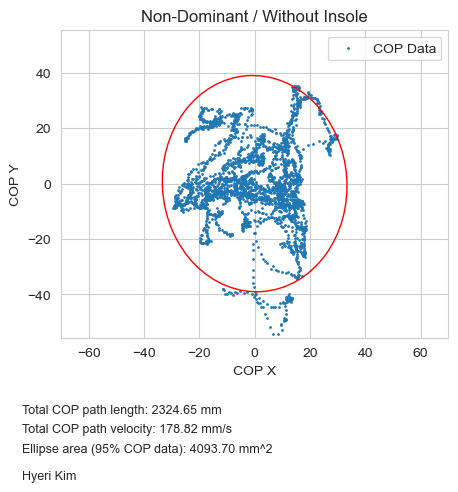

2600
Total COP path length: 2017.25 mm
Total COP path velocity: 155.17 mm/s
Ellipse area (95% COP data): 2478.44 mm^2


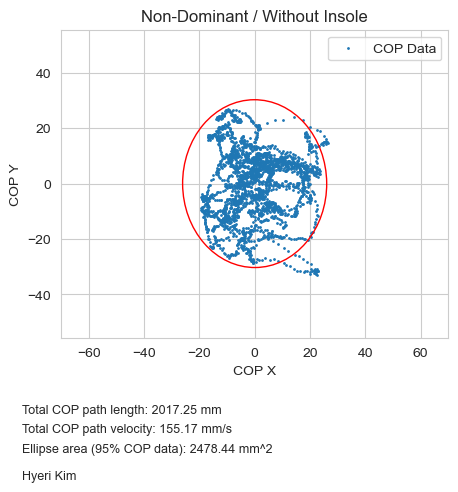

2600
Total COP path length: 1905.46 mm
Total COP path velocity: 146.57 mm/s
Ellipse area (95% COP data): 2706.18 mm^2


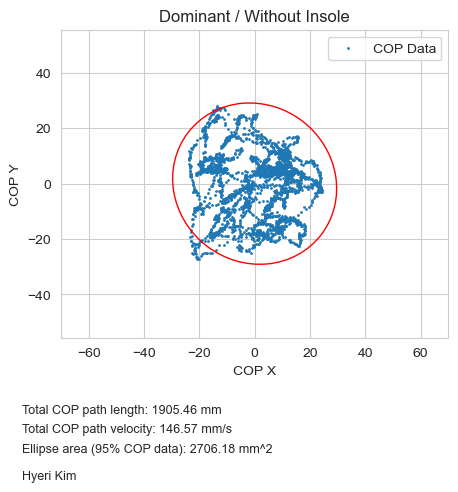

2600
Total COP path length: 1856.18 mm
Total COP path velocity: 142.78 mm/s
Ellipse area (95% COP data): 2291.87 mm^2


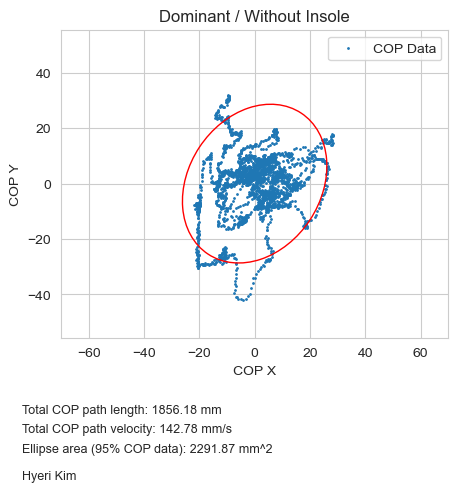

2600
Total COP path length: 1897.20 mm
Total COP path velocity: 145.94 mm/s
Ellipse area (95% COP data): 2807.42 mm^2


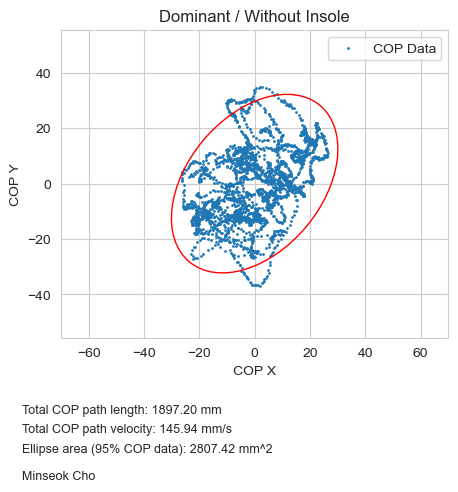

2600
Total COP path length: 2364.71 mm
Total COP path velocity: 181.90 mm/s
Ellipse area (95% COP data): 6064.48 mm^2


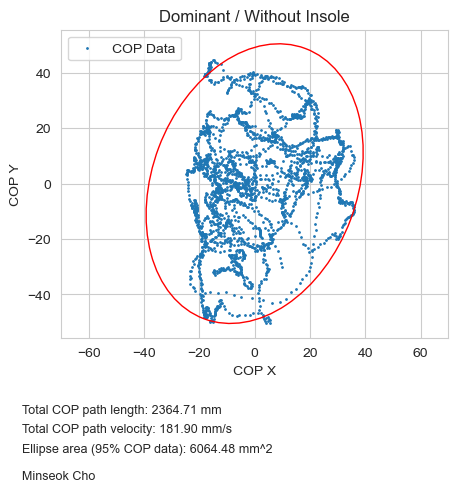

2600
Total COP path length: 2077.29 mm
Total COP path velocity: 159.79 mm/s
Ellipse area (95% COP data): 3728.05 mm^2


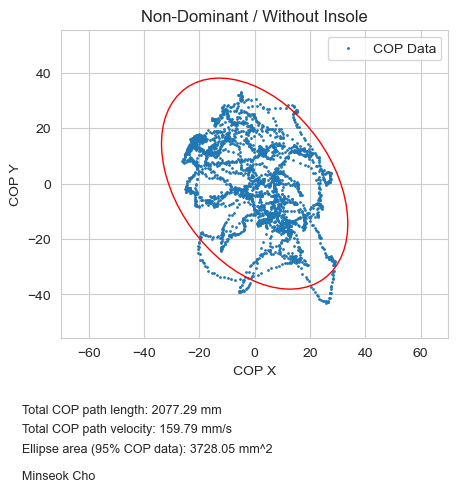

2600
Total COP path length: 1929.59 mm
Total COP path velocity: 148.43 mm/s
Ellipse area (95% COP data): 3965.13 mm^2


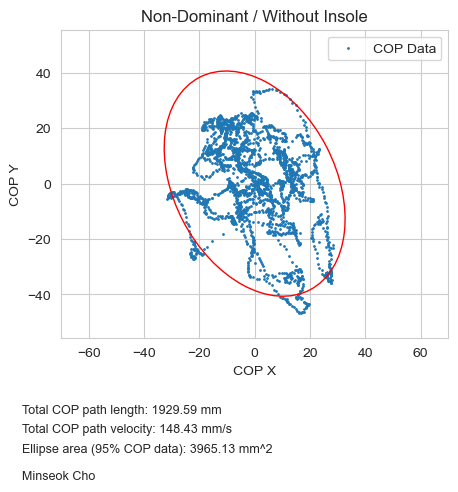

2600
Total COP path length: 2303.25 mm
Total COP path velocity: 177.17 mm/s
Ellipse area (95% COP data): 4927.23 mm^2


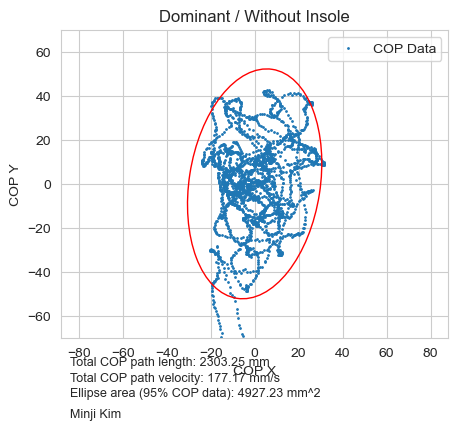

2600
Total COP path length: 1872.90 mm
Total COP path velocity: 144.07 mm/s
Ellipse area (95% COP data): 3422.69 mm^2


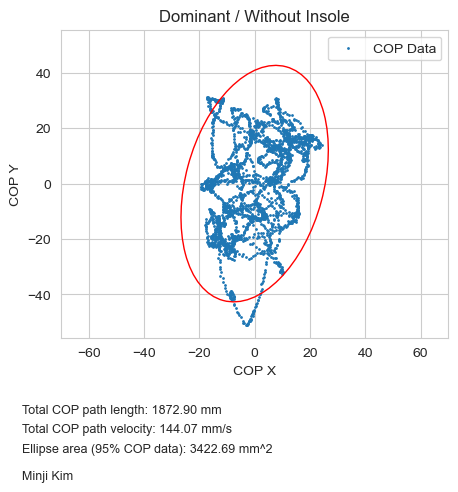

2600
Total COP path length: 2362.43 mm
Total COP path velocity: 181.73 mm/s
Ellipse area (95% COP data): 5389.25 mm^2


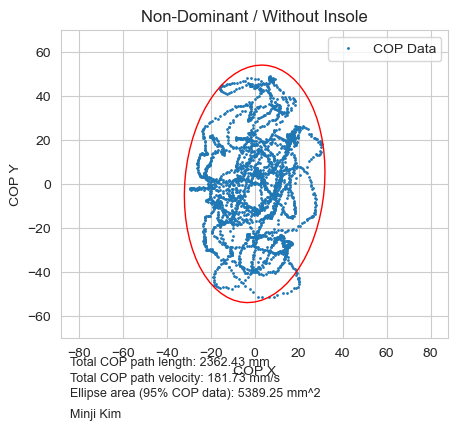

2600
Total COP path length: 1807.71 mm
Total COP path velocity: 139.05 mm/s
Ellipse area (95% COP data): 3395.78 mm^2


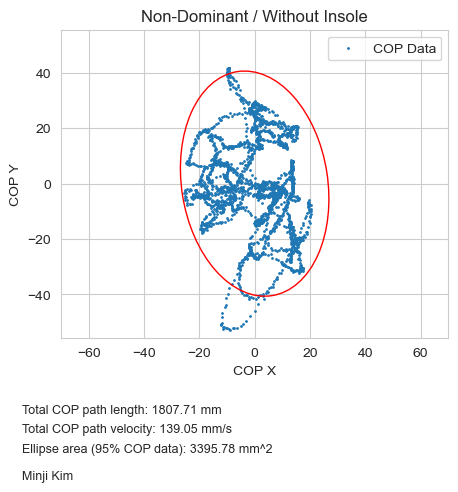

2600
Total COP path length: 2447.77 mm
Total COP path velocity: 188.29 mm/s
Ellipse area (95% COP data): 6896.67 mm^2


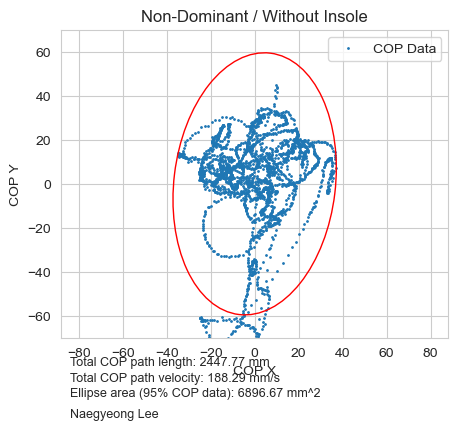

2600
Total COP path length: 2234.25 mm
Total COP path velocity: 171.87 mm/s
Ellipse area (95% COP data): 3508.60 mm^2


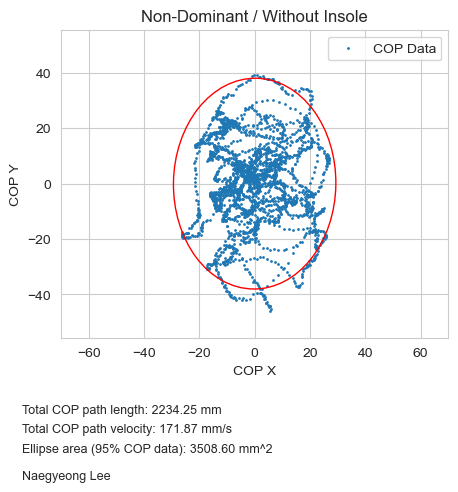

2600
Total COP path length: 2267.65 mm
Total COP path velocity: 174.43 mm/s
Ellipse area (95% COP data): 3407.81 mm^2


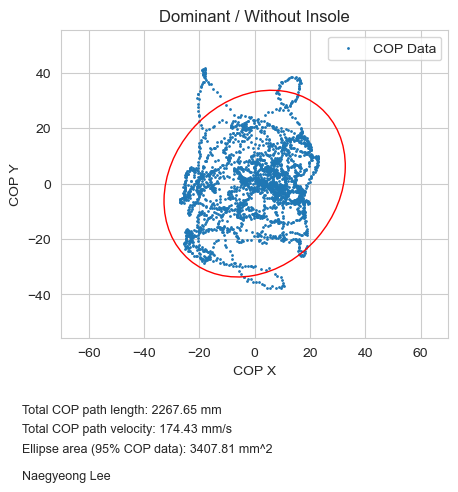

2600
Total COP path length: 2048.50 mm
Total COP path velocity: 157.58 mm/s
Ellipse area (95% COP data): 2888.99 mm^2


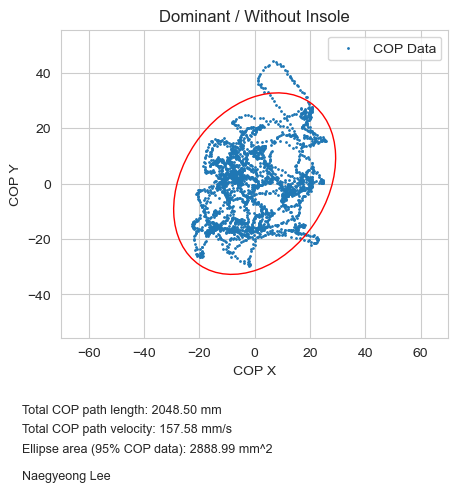

2600
Total COP path length: 1963.74 mm
Total COP path velocity: 151.06 mm/s
Ellipse area (95% COP data): 2161.73 mm^2


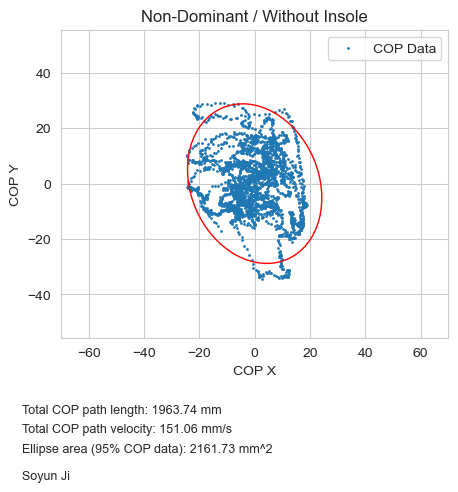

2600
Total COP path length: 1889.14 mm
Total COP path velocity: 145.32 mm/s
Ellipse area (95% COP data): 2229.60 mm^2


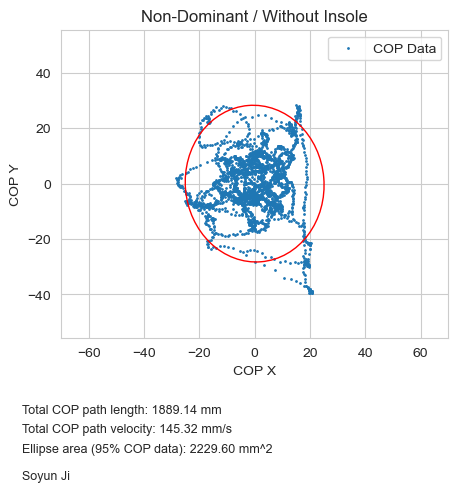

2600
Total COP path length: 1921.86 mm
Total COP path velocity: 147.84 mm/s
Ellipse area (95% COP data): 1796.99 mm^2


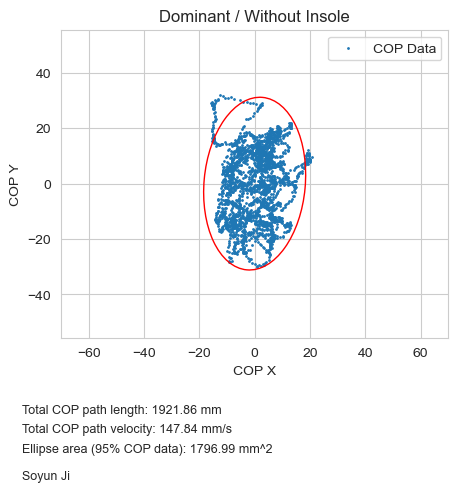

2600
Total COP path length: 2325.75 mm
Total COP path velocity: 178.90 mm/s
Ellipse area (95% COP data): 4673.93 mm^2


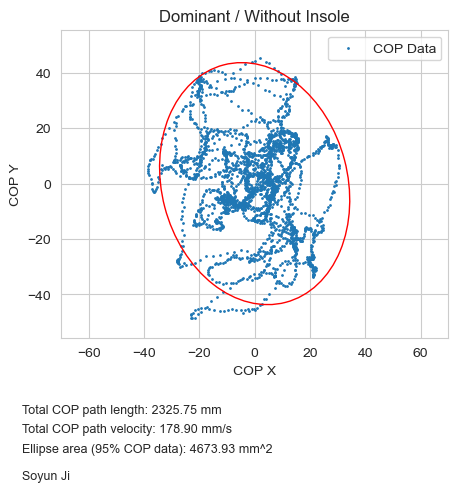

2600
Total COP path length: 1899.34 mm
Total COP path velocity: 146.10 mm/s
Ellipse area (95% COP data): 3569.98 mm^2


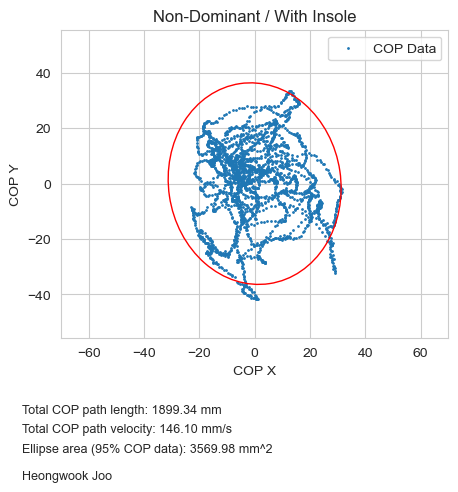

2600
Total COP path length: 2076.32 mm
Total COP path velocity: 159.72 mm/s
Ellipse area (95% COP data): 4481.59 mm^2


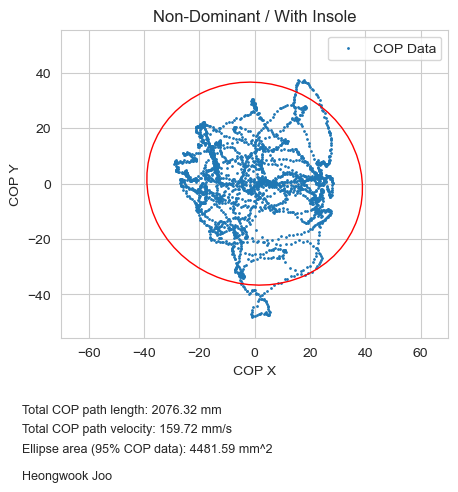

2600
Total COP path length: 2076.14 mm
Total COP path velocity: 159.70 mm/s
Ellipse area (95% COP data): 4141.43 mm^2


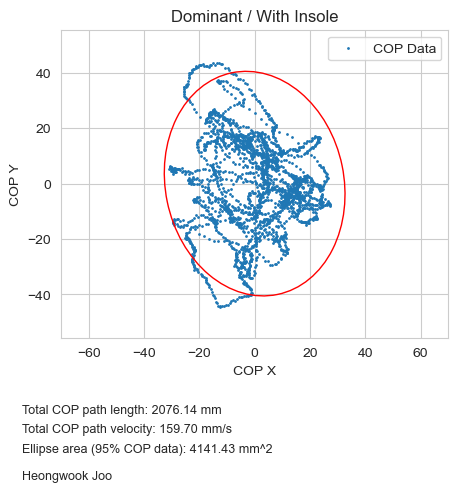

2600
Total COP path length: 1856.28 mm
Total COP path velocity: 142.79 mm/s
Ellipse area (95% COP data): 3590.45 mm^2


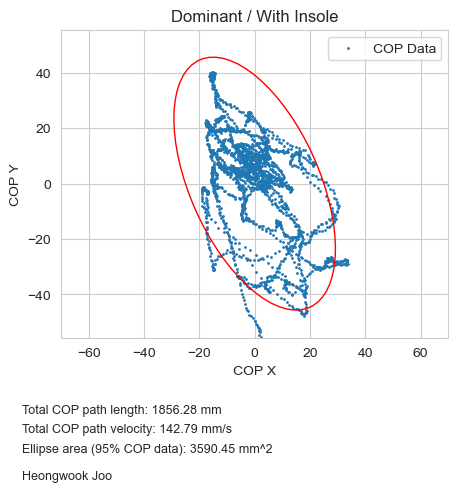

2600
Total COP path length: 2049.73 mm
Total COP path velocity: 157.67 mm/s
Ellipse area (95% COP data): 3243.20 mm^2


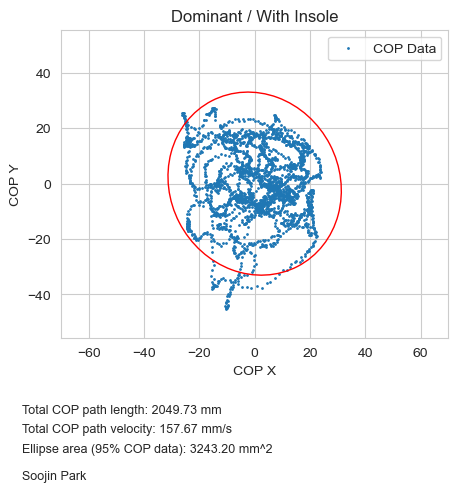

2600
Total COP path length: 1939.79 mm
Total COP path velocity: 149.21 mm/s
Ellipse area (95% COP data): 2410.27 mm^2


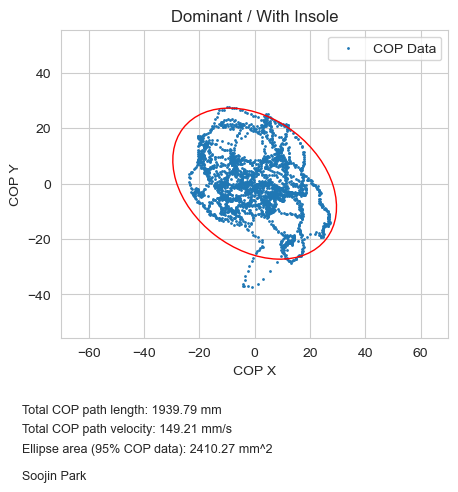

2600
Total COP path length: 1693.75 mm
Total COP path velocity: 130.29 mm/s
Ellipse area (95% COP data): 2423.97 mm^2


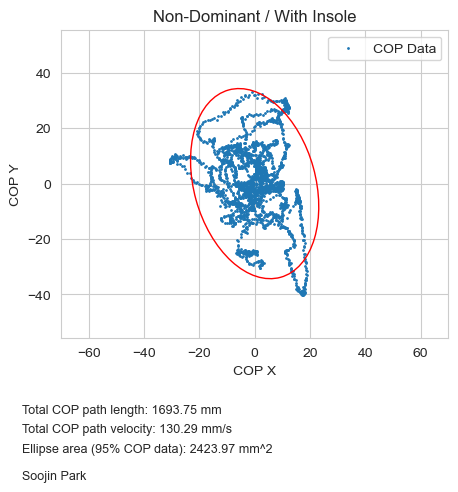

2600
Total COP path length: 2042.84 mm
Total COP path velocity: 157.14 mm/s
Ellipse area (95% COP data): 3286.38 mm^2


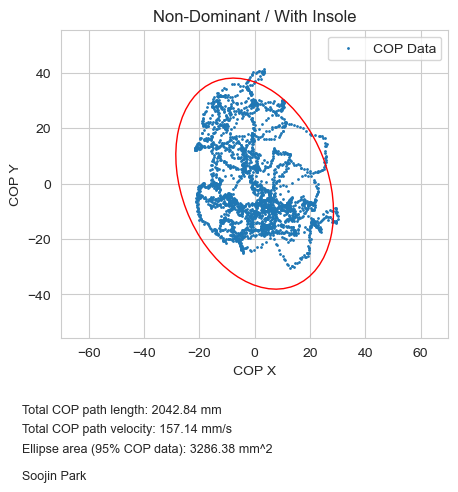

2600
Total COP path length: 2116.93 mm
Total COP path velocity: 162.84 mm/s
Ellipse area (95% COP data): 2763.42 mm^2


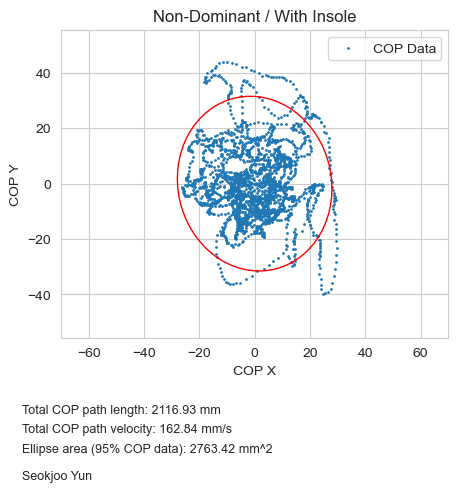

2600
Total COP path length: 2149.97 mm
Total COP path velocity: 165.38 mm/s
Ellipse area (95% COP data): 4306.53 mm^2


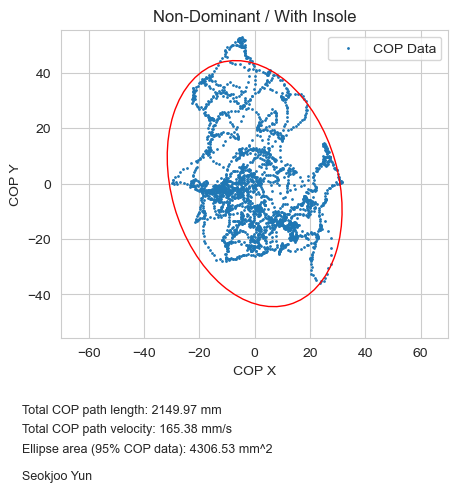

2600
Total COP path length: 2367.50 mm
Total COP path velocity: 182.12 mm/s
Ellipse area (95% COP data): 3787.19 mm^2


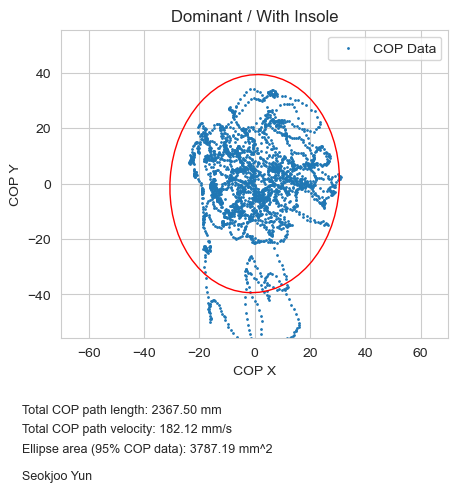

2600
Total COP path length: 2296.79 mm
Total COP path velocity: 176.68 mm/s
Ellipse area (95% COP data): 2672.15 mm^2


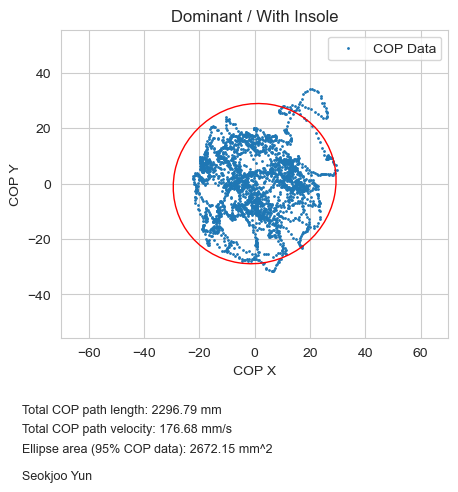

2600
Total COP path length: 2326.07 mm
Total COP path velocity: 178.93 mm/s
Ellipse area (95% COP data): 2867.47 mm^2


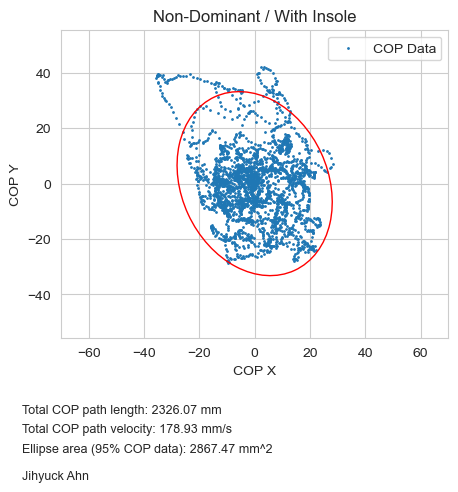

2600
Total COP path length: 2127.36 mm
Total COP path velocity: 163.64 mm/s
Ellipse area (95% COP data): 1849.92 mm^2


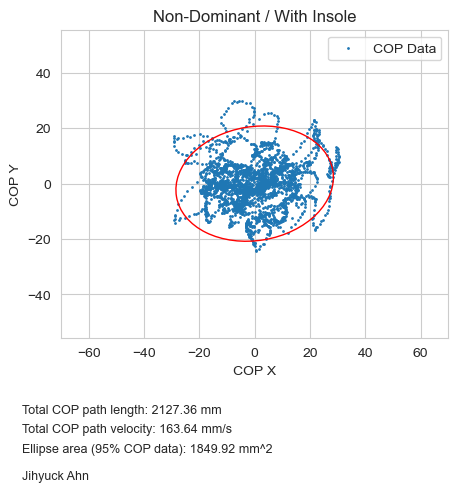

2600
Total COP path length: 2256.01 mm
Total COP path velocity: 173.54 mm/s
Ellipse area (95% COP data): 2890.32 mm^2


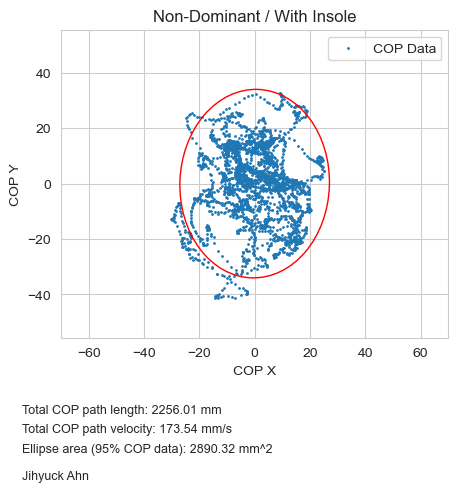

2600
Total COP path length: 2304.23 mm
Total COP path velocity: 177.25 mm/s
Ellipse area (95% COP data): 2466.54 mm^2


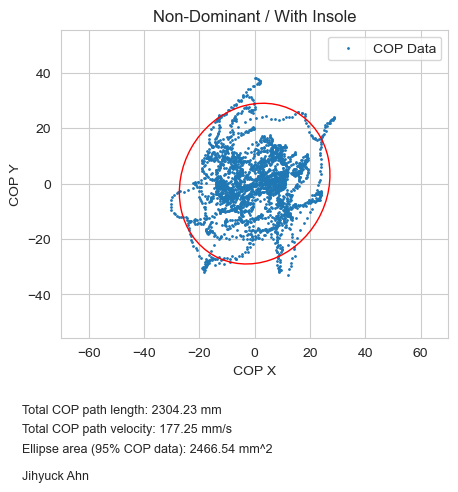

2600
Total COP path length: 2038.24 mm
Total COP path velocity: 156.79 mm/s
Ellipse area (95% COP data): 2365.51 mm^2


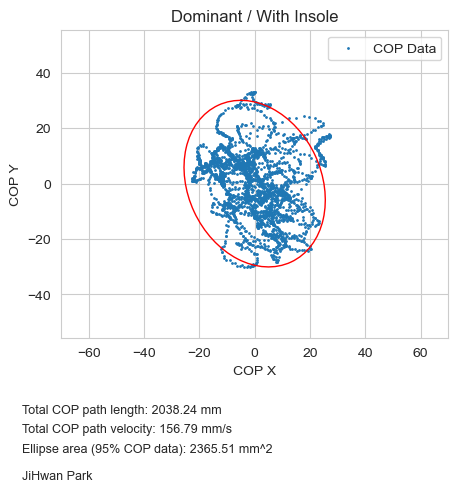

2600
Total COP path length: 1961.32 mm
Total COP path velocity: 150.87 mm/s
Ellipse area (95% COP data): 2730.83 mm^2


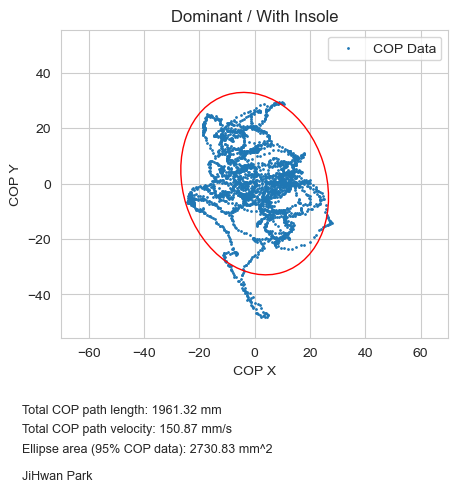

2600
Total COP path length: 2464.46 mm
Total COP path velocity: 189.57 mm/s
Ellipse area (95% COP data): 4090.59 mm^2


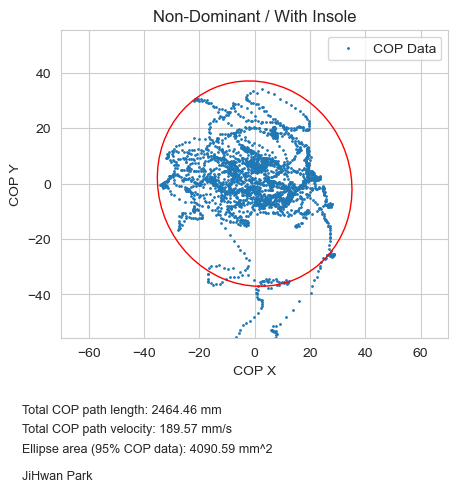

2600
Total COP path length: 2532.71 mm
Total COP path velocity: 194.82 mm/s
Ellipse area (95% COP data): 3101.45 mm^2


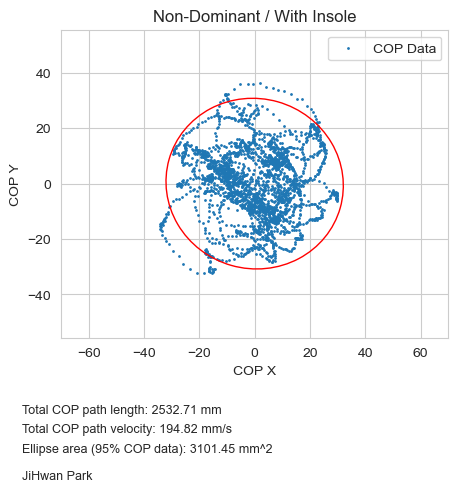

2600
Total COP path length: 2194.66 mm
Total COP path velocity: 168.82 mm/s
Ellipse area (95% COP data): 2454.05 mm^2


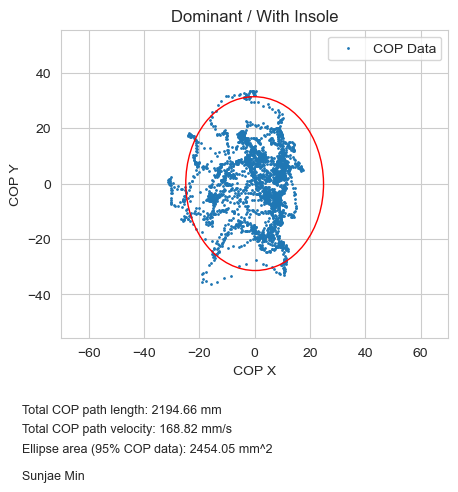

2600
Total COP path length: 2565.65 mm
Total COP path velocity: 197.36 mm/s
Ellipse area (95% COP data): 3371.95 mm^2


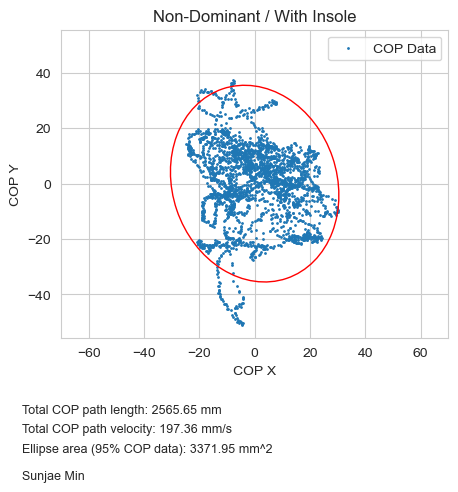

2600
Total COP path length: 2788.89 mm
Total COP path velocity: 214.53 mm/s
Ellipse area (95% COP data): 5519.65 mm^2


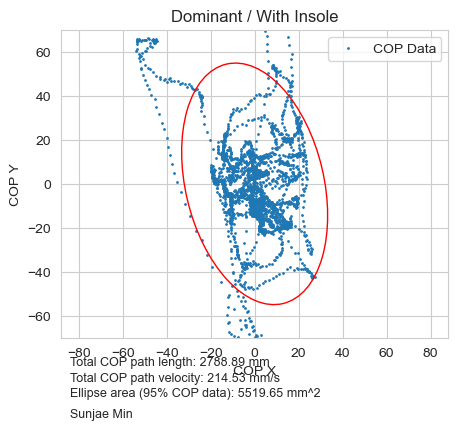

2600
Total COP path length: 2341.75 mm
Total COP path velocity: 180.13 mm/s
Ellipse area (95% COP data): 3245.43 mm^2


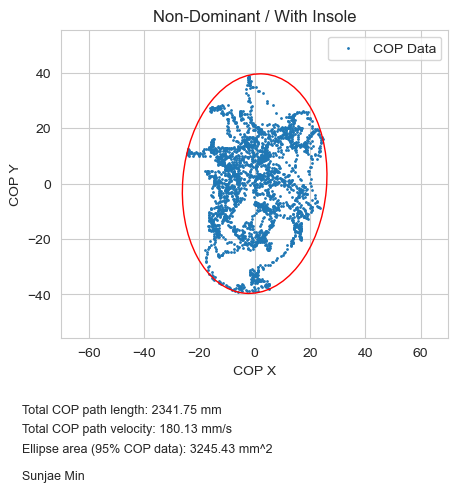

2600
Total COP path length: 2009.73 mm
Total COP path velocity: 154.59 mm/s
Ellipse area (95% COP data): 4230.76 mm^2


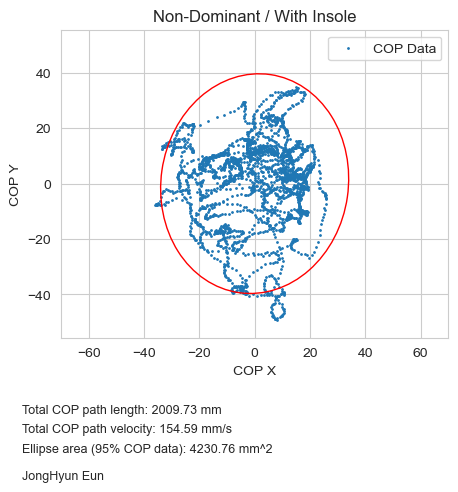

2600
Total COP path length: 1931.03 mm
Total COP path velocity: 148.54 mm/s
Ellipse area (95% COP data): 3415.68 mm^2


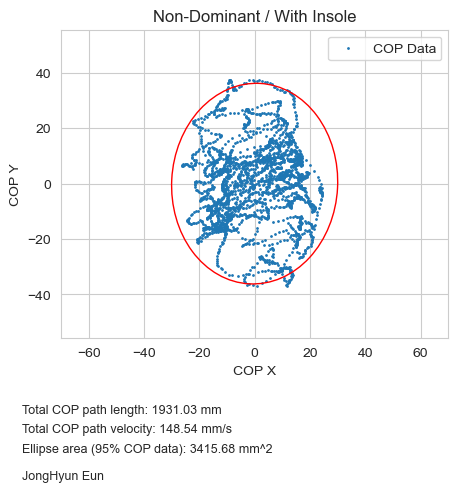

2600
Total COP path length: 1651.73 mm
Total COP path velocity: 127.06 mm/s
Ellipse area (95% COP data): 1708.70 mm^2


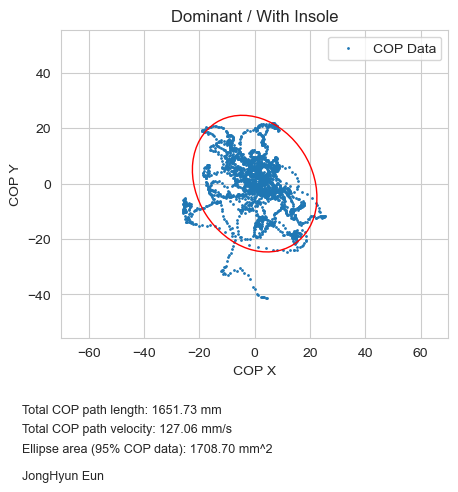

2600
Total COP path length: 1771.30 mm
Total COP path velocity: 136.25 mm/s
Ellipse area (95% COP data): 2081.11 mm^2


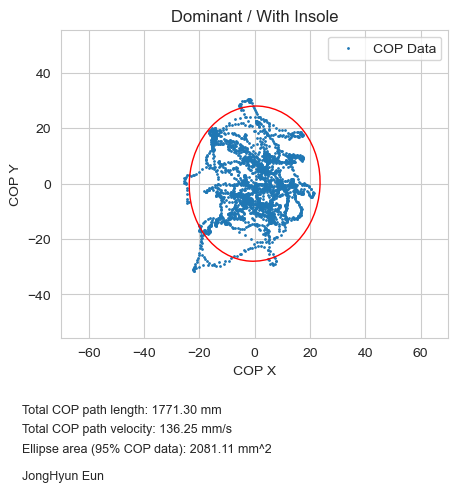

2600
Total COP path length: 2301.39 mm
Total COP path velocity: 177.03 mm/s
Ellipse area (95% COP data): 2929.74 mm^2


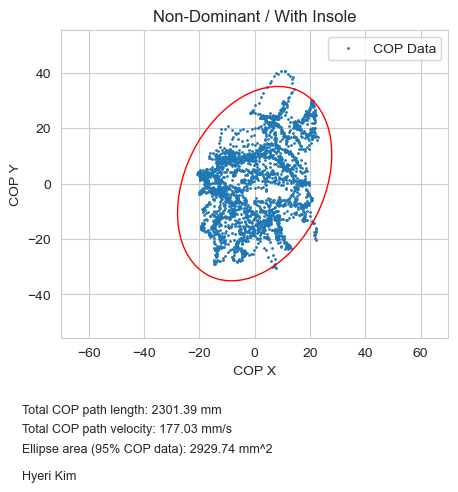

2600
Total COP path length: 2043.41 mm
Total COP path velocity: 157.19 mm/s
Ellipse area (95% COP data): 2319.86 mm^2


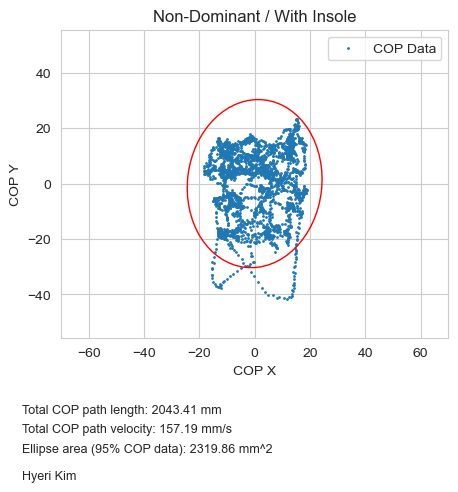

2600
Total COP path length: 2099.13 mm
Total COP path velocity: 161.47 mm/s
Ellipse area (95% COP data): 2275.60 mm^2


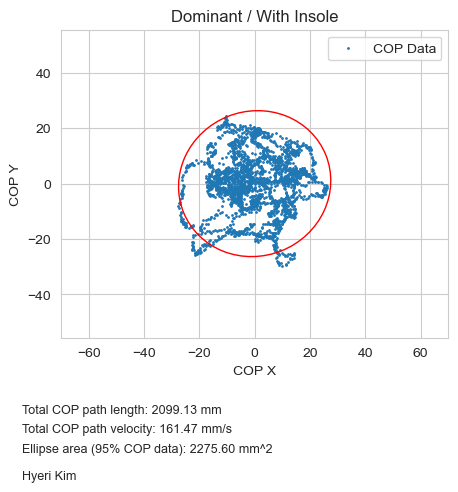

2600
Total COP path length: 2261.57 mm
Total COP path velocity: 173.97 mm/s
Ellipse area (95% COP data): 2813.27 mm^2


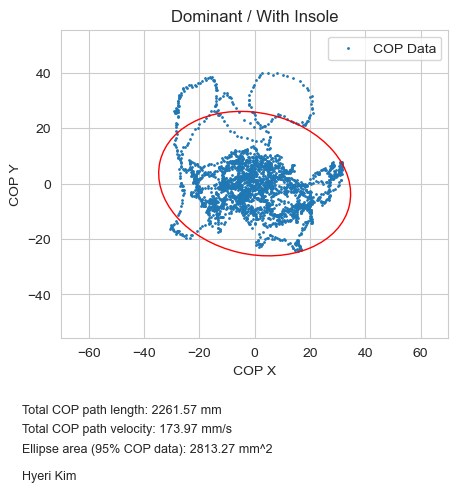

2600
Total COP path length: 2203.88 mm
Total COP path velocity: 169.53 mm/s
Ellipse area (95% COP data): 3333.85 mm^2


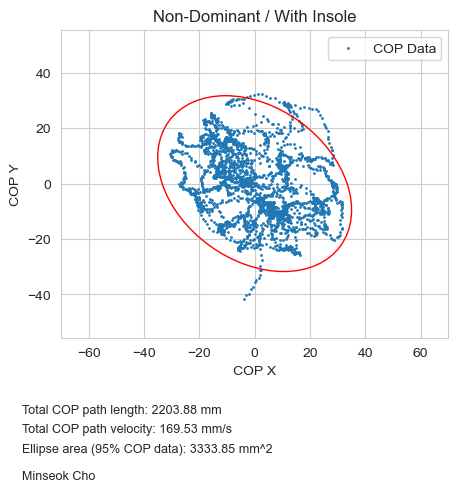

2600
Total COP path length: 2138.26 mm
Total COP path velocity: 164.48 mm/s
Ellipse area (95% COP data): 6048.90 mm^2


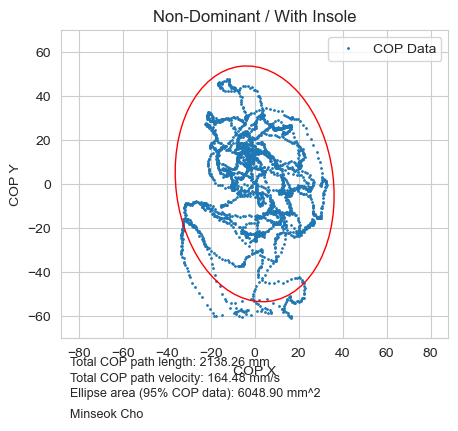

2600
Total COP path length: 2024.64 mm
Total COP path velocity: 155.74 mm/s
Ellipse area (95% COP data): 3155.61 mm^2


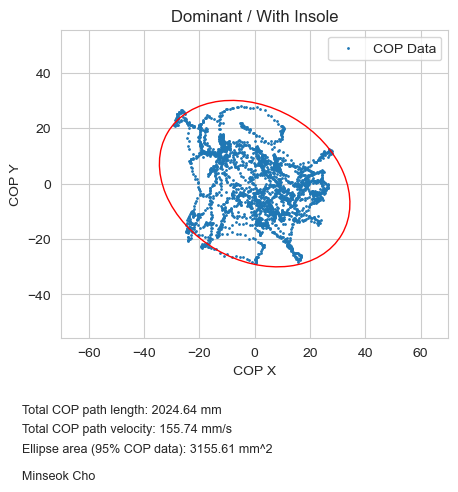

2600
Total COP path length: 2334.86 mm
Total COP path velocity: 179.60 mm/s
Ellipse area (95% COP data): 6976.00 mm^2


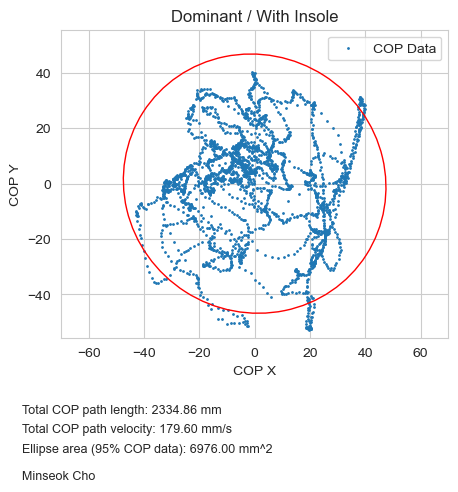

2600
Total COP path length: 1796.46 mm
Total COP path velocity: 138.19 mm/s
Ellipse area (95% COP data): 2453.40 mm^2


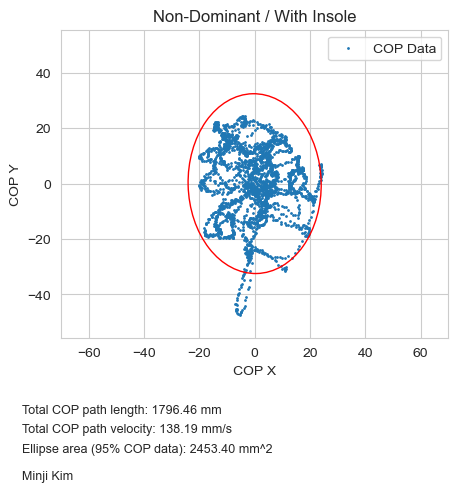

2600
Total COP path length: 1793.44 mm
Total COP path velocity: 137.96 mm/s
Ellipse area (95% COP data): 2293.68 mm^2


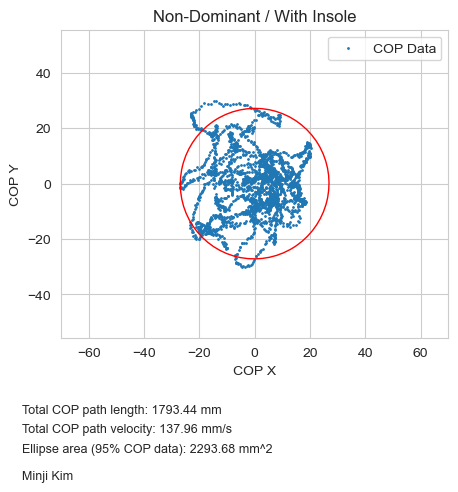

2600
Total COP path length: 1918.71 mm
Total COP path velocity: 147.59 mm/s
Ellipse area (95% COP data): 3183.31 mm^2


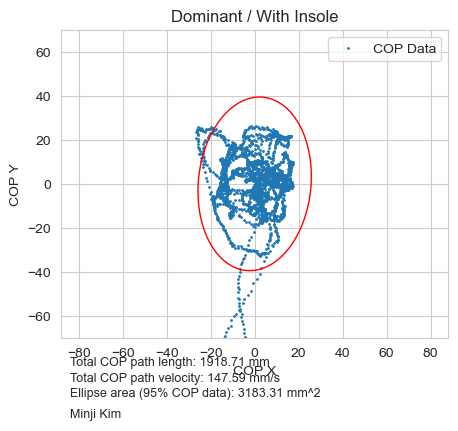

2600
Total COP path length: 1694.10 mm
Total COP path velocity: 130.32 mm/s
Ellipse area (95% COP data): 1428.75 mm^2


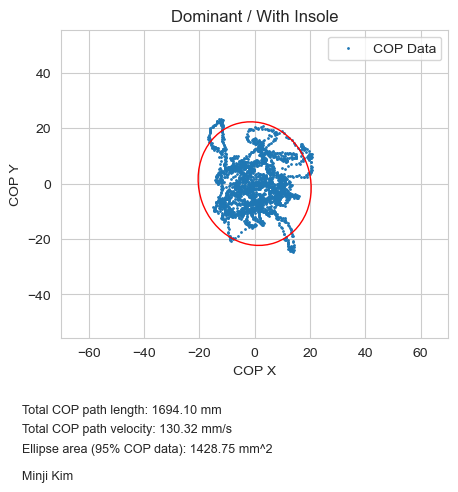

2600
Total COP path length: 1818.75 mm
Total COP path velocity: 139.90 mm/s
Ellipse area (95% COP data): 1505.95 mm^2


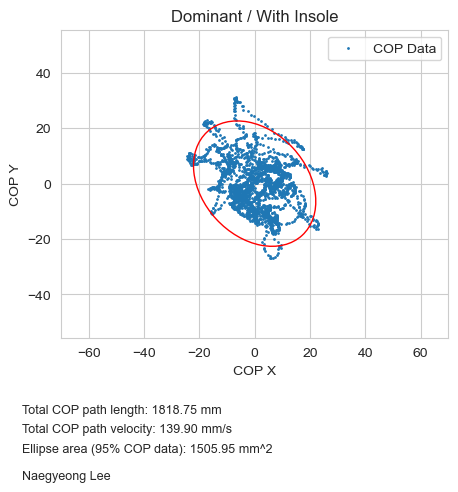

2600
Total COP path length: 1752.48 mm
Total COP path velocity: 134.81 mm/s
Ellipse area (95% COP data): 2255.02 mm^2


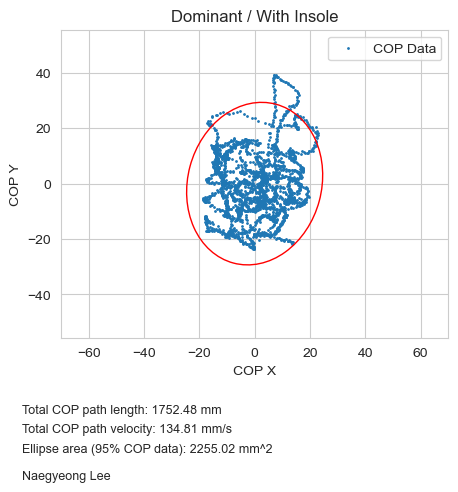

2600
Total COP path length: 2447.20 mm
Total COP path velocity: 188.25 mm/s
Ellipse area (95% COP data): 5156.37 mm^2


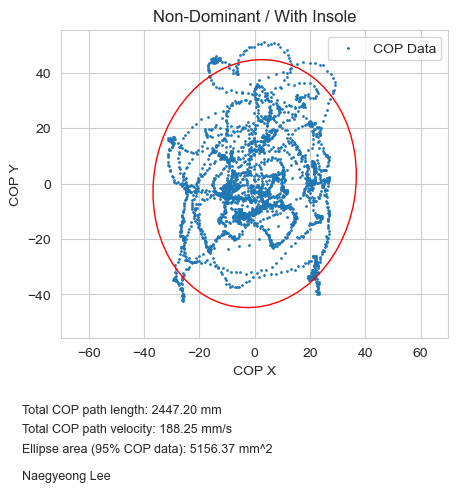

2600
Total COP path length: 2257.28 mm
Total COP path velocity: 173.64 mm/s
Ellipse area (95% COP data): 4011.26 mm^2


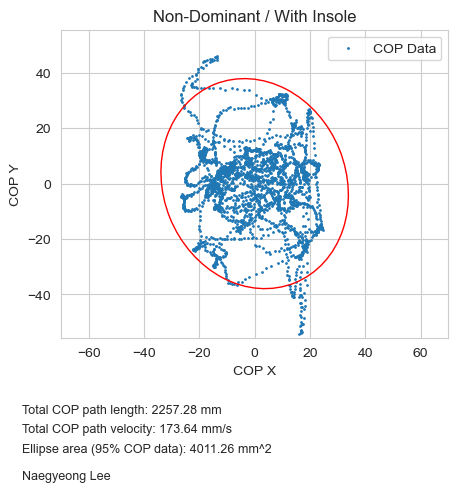

2600
Total COP path length: 2102.78 mm
Total COP path velocity: 161.75 mm/s
Ellipse area (95% COP data): 6661.72 mm^2


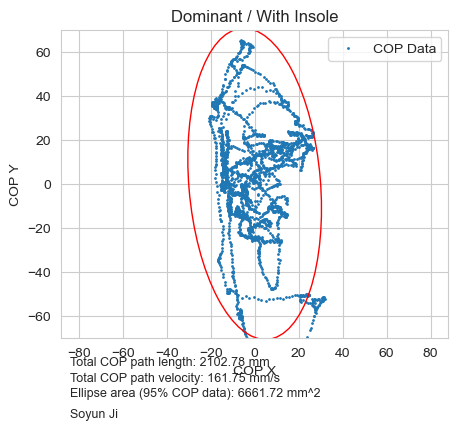

2600
Total COP path length: 1831.50 mm
Total COP path velocity: 140.88 mm/s
Ellipse area (95% COP data): 2163.21 mm^2


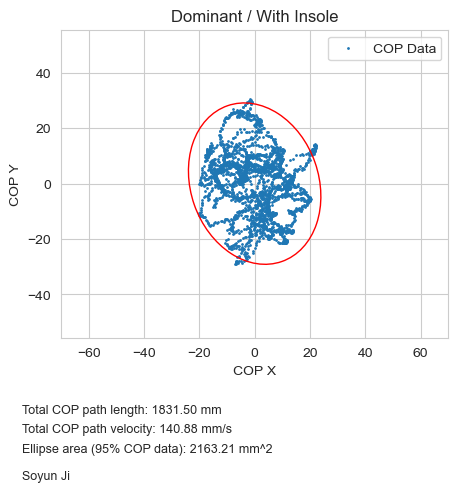

2600
Total COP path length: 1824.37 mm
Total COP path velocity: 140.34 mm/s
Ellipse area (95% COP data): 2138.58 mm^2


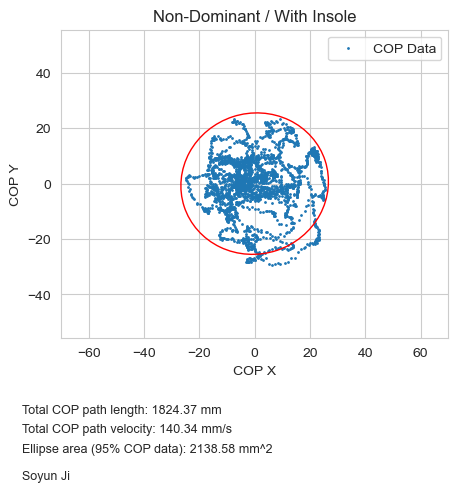

2600
Total COP path length: 1984.08 mm
Total COP path velocity: 152.62 mm/s
Ellipse area (95% COP data): 2018.43 mm^2


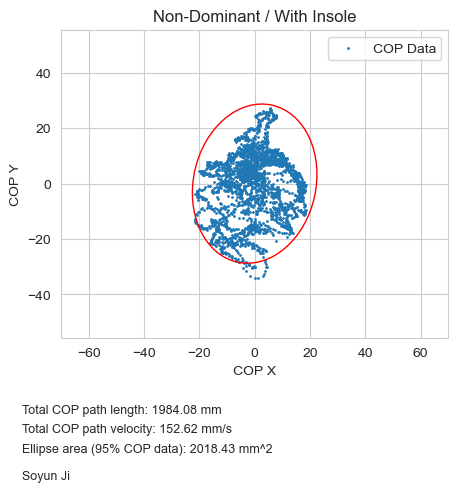

In [58]:
SL = {
    '1차' : {
        'dominant' : '',
        'nondom' : ''},
    '2차' : {
        'dominant' : '',
        'nondom' : ''},
 }

for DIR in [FST_SL_DIR, SCD_SL_DIR]:
    domi = []
    nondom = []
    for file_dir in DIR:
        _, name, order, trial = file_dir.split('/')
        if 'Right' in file_dir:
            cols = ['COPX Right', 'COPY Right']
            side = 'right'
        elif 'Left' in file_dir:
            cols = ['COPX Left','COPY Left']
            side = 'left'

        if name in dominant[side]:
            dom = 'dominant'
        else:
            dom = 'nondom'
        
        df = pd.read_csv(file_dir,sep=',',skiprows=8)
        cop_data = np.array(df[cols])[200:-201,:]
        cop_data[:,0] = cop_data[:,0] - cop_data[:,0].mean()
        cop_data[:,1] = cop_data[:,1] - cop_data[:,1].mean()
        print(len(cop_data))
        N = cop_data.shape[0]
        sr= 200
        time = N/sr
        path_length = calculate_cop_path_length(cop_data)
        ellipse, ellipse_area = fit_ellipse_to_cop_data(cop_data)
        x = [path_length, path_length/time, ellipse_area]
        if dom =='dominant':
            domi.append(x)
            lb = 'Dominant'
        elif dom == 'nondom':
            nondom.append(x)
            lb = 'Non-Dominant'
        
        if order == '1차':
            ord = 'Without Insole'
        elif order == '2차':
            ord = 'With Insole'
                    
        print(f"Total COP path length: {path_length:.2f} mm")
        print(f"Total COP path velocity: {path_length/time:.2f} mm/s")
        print(f"Ellipse area (95% COP data): {ellipse_area:.2f} mm^2")

        # Plotting
        plot_ellipse(cop_data, coverage =0.95)
        plt.title(f"{lb} / {ord}")
        plt.xlim(-70,70)
        plt.ylim(-70,70)
        ax = plt.gca()
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        
        plt.text(x_min - (x_max - x_min)* 0.1, y_min - (y_max - y_min) * 0.1,
         f"Total COP path length: {path_length:.2f} mm",
         ha='left', va='bottom', fontsize=9)
        plt.text(x_min - (x_max - x_min)* 0.1, y_min - (y_max - y_min) * 0.15,
         f"Total COP path velocity: {path_length/time:.2f} mm/s",
         ha='left', va='bottom', fontsize=9)
        plt.text(x_min - (x_max - x_min)* 0.1, y_min - (y_max - y_min) * 0.2,
         f"Ellipse area (95% COP data): {ellipse_area:.2f} mm^2",
         ha='left', va='bottom', fontsize=9)
        plt.text(x_min - (x_max - x_min)* 0.1, y_min - (y_max - y_min) * 0.27,
         f"{name}",
         ha='left', va='bottom', fontsize=9)
        plt.show()
    
    
    SL[order]['dominant'] = domi
    SL[order]['nondom'] = nondom

In [32]:
cop_data[:,0]

array([ 5.306358,  4.531257,  4.216543, ..., -4.718185, -4.503315,
       -3.688205])

In [33]:
SL['1차']['dominant'] = pd.DataFrame(SL['1차']['dominant'], columns=['Length','Velocity','Area'])
SL['2차']['dominant'] = pd.DataFrame(SL['2차']['dominant'], columns=['Length','Velocity','Area'])

SL['1차']['nondom'] = pd.DataFrame(SL['1차']['nondom'], columns=['Length','Velocity','Area'])
SL['2차']['nondom'] = pd.DataFrame(SL['2차']['nondom'], columns=['Length','Velocity','Area'])

In [34]:
data = {
    'Length' : '',
    'Velocity' : '',
    'Area' : ''
}
for c in SL['1차']['dominant'].columns:
    pre = SL['1차']['dominant'][[c]]
    post = SL['2차']['dominant'][[c]]
    df = pd.concat([pre,post],axis=1)
    df.columns = ['pre','post']
    melted_df = df.melt(var_name="Condition", value_name="values")
    for i in range(len(melted_df['Condition'])):
        if melted_df['Condition'][i] == 'pre':
            melted_df['Condition'][i] = 'Without Insole'
        elif melted_df['Condition'][i] == 'post':
            melted_df['Condition'][i] = 'With Insole'
    data[c] = melted_df
    
    display(pg.normality(pre))
    display(pg.normality(post))
    display(pg.homoscedasticity(df))


W      pval  normal
Length  0.908864  0.044882   False

W      pval  normal
Length  0.941647  0.214003    True

W      pval  equal_var
levene  0.390079  0.535636       True

W      pval  normal
Velocity  0.921921  0.083317    True

W      pval  normal
Velocity  0.941647  0.214003    True

W      pval  equal_var
levene  1.765667  0.191094       True

W      pval  normal
Area  0.934127  0.149546    True

W      pval  normal
Area  0.835531  0.001904   False

W      pval  equal_var
levene  0.440633  0.510445       True

In [35]:
for c in SL['1차']['dominant'].columns:
    pre = SL['1차']['dominant'][c]
    post = SL['2차']['dominant'][c]
    print(c)
    display(pg.ttest(pre,post, paired=True).round(3))

Length


T  dof alternative  p-val              CI95%  cohen-d   BF10  \
T-test -0.641   21   two-sided  0.529  [-229.67, 121.51]    0.211  0.268   

        power  
T-test  0.157

Velocity


T  dof alternative  p-val           CI95%  cohen-d   BF10  power
T-test  0.427   21   two-sided  0.674  [-7.73, 11.72]    0.113  0.242   0.08

Area


T  dof alternative  p-val              CI95%  cohen-d   BF10  \
T-test  0.141   21   two-sided  0.889  [-731.15, 837.83]     0.04  0.225   

        power  
T-test  0.054

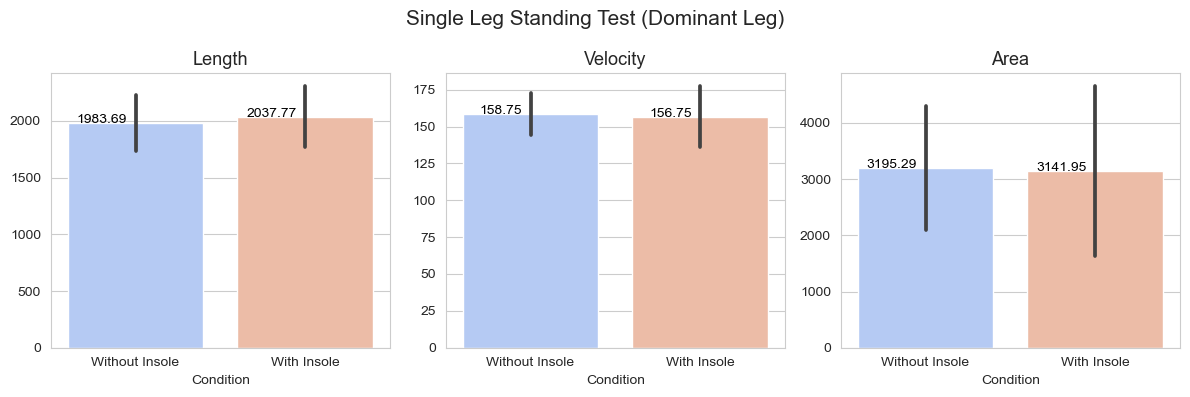

In [36]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3, figsize=(12,4))
for i, c in enumerate(['Length','Velocity','Area']):
    means = data[c].groupby("Condition")['values'].mean()
    means = pd.DataFrame(means)
    sns.barplot(data=data[c],x='Condition',y='values', ci='sd',ax=ax[i],palette="coolwarm")
    for index, row in means.iterrows():
        if index == 'Without Insole':
            index = 0
        elif index == 'With Insole':
            index = 1
        ax[i].text(index-0.05,row.values[0], f"{row.values[0]:.2f}", color = 'black', ha='right')
    # Set title and labels
    ax[i].set_title(c, fontsize=13)
    # ax[i].set_xlabel('Condition', fontsize=14)

    ax[i].set_ylabel('', fontsize=14)

plt.suptitle('Single Leg Standing Test (Dominant Leg)',fontsize=15)
plt.tight_layout()
plt.savefig('Single Leg Standing Dominant.png',dpi=300)

In [37]:
for c in SL['1차']['nondom'].columns:
    pre = SL['1차']['nondom'][[c]]
    post = SL['2차']['nondom'][[c]]
    df = pd.concat([pre,post],axis=1)
    df.columns = ['pre','post']
    melted_df = df.melt(var_name="Condition", value_name="values")
    for i in range(len(melted_df['Condition'])):
        if melted_df['Condition'][i] == 'pre':
            melted_df['Condition'][i] = 'Without Insole'
        elif melted_df['Condition'][i] == 'post':
            melted_df['Condition'][i] = 'With Insole'
    data[c] = melted_df
    display(pg.normality(pre))
    display(pg.normality(post))
    display(pg.homoscedasticity(df))

W      pval  normal
Length  0.981748  0.908665    True

W      pval  normal
Length  0.979943  0.872705    True

W      pval  equal_var
levene  4.048466  0.049615      False

W      pval  normal
Velocity  0.977509  0.817149    True

W      pval  normal
Velocity  0.979942  0.872701    True

W      pval  equal_var
levene  2.052842  0.158145       True

W      pval  normal
Area  0.958445  0.361871    True

W     pval  normal
Area  0.937232  0.11533    True

W      pval  equal_var
levene  4.347109  0.042198      False

In [38]:
for c in SL['1차']['nondom'].columns:
    pre = SL['1차']['nondom'][c]
    post = SL['2차']['nondom'][c]
    print(c)
    display(pg.ttest(pre,post, paired=True).round(3))

Length


T  dof alternative  p-val            CI95%  cohen-d  BF10  power
T-test  0.704   25   two-sided  0.488  [-82.8, 168.76]    0.142  0.26  0.107

Velocity


T  dof alternative  p-val         CI95%  cohen-d   BF10  power
T-test  2.368   25   two-sided  0.026  [1.16, 16.6]    0.427  2.142  0.553

Area


T  dof alternative  p-val             CI95%  cohen-d   BF10  power
T-test  2.181   25   two-sided  0.039  [36.04, 1257.79]    0.497  1.545  0.683

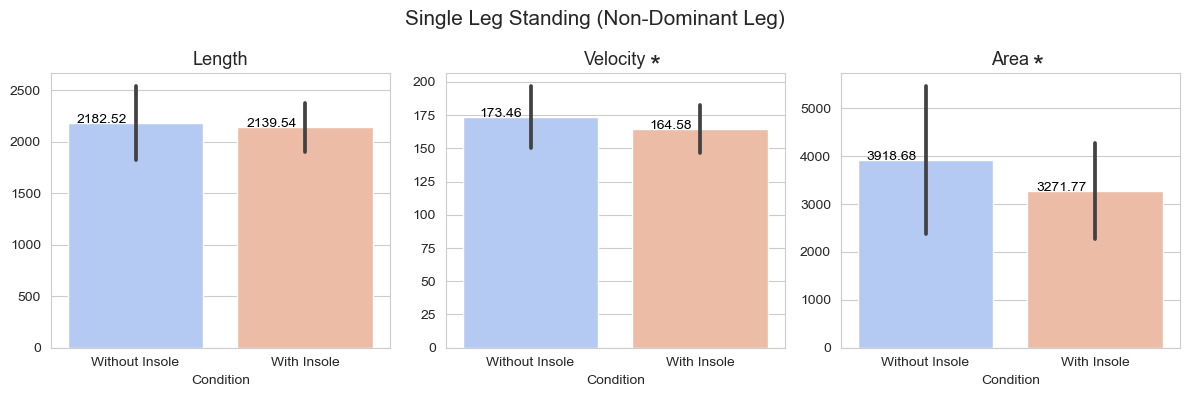

In [39]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
for i, c in enumerate(['Length','Velocity','Area']):
    means = data[c].groupby("Condition")['values'].mean()
    means = pd.DataFrame(means)
    sns.barplot(data=data[c],x='Condition',y='values', ci='sd',ax=ax[i],palette="coolwarm")
    for index, row in means.iterrows():
        if index == 'Without Insole':
            index = 0
        elif index == 'With Insole':
            index = 1
        ax[i].text(index-0.05,row.values[0], f"{row.values[0]:.2f}", color = 'black', ha='right')
    # Set title and labels
    ax[i].set_title(c, fontsize=13)
    # ax[i].set_xlabel('Condition', fontsize=14)

    ax[i].set_ylabel('', fontsize=14)

ax[1].text(x=0.7, y= 206, s = '*',fontsize=20)
ax[2].text(x=0.63, y= 5700, s = '*',fontsize=20)
plt.suptitle('Single Leg Standing (Non-Dominant Leg)',fontsize=15)
plt.tight_layout()
plt.savefig('Single Leg Standing Non-DOM.png',dpi=300)